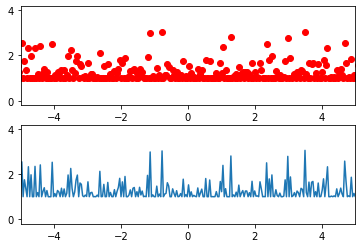

In [61]:
from math import dist
import numpy as np 
from matplotlib import pyplot as plt 
from numpy.random import normal


# Generation of de distribution
# data1 = []
# data2 = []
# data3 = []
# data4 = []

# for i in range(100000):
#     data1.append(normal(0,0.8))
#     data2.append(normal(2,2))
#     data3.append(normal(-4,1))
#     data4.append(normal(5,2))

# data = data1 + data2 + data3 + data4


def h(i,m,z):
    if i==1:
        return 1.0 if z<0.0 else np.max((0.0, 1.0-z))
    elif i==m:
        return np.max((0, 1.0+z)) if z<0.0 else 1.0
    else:
        return np.max((0.0, 1.0-np.abs(z)))



def to_dirac(distribution, n_output):
    #Create the locations
    if n_output <= 1:
        return np.mean(distribution), len(distribution)
    

    # I make the choice to have dirac's impulsion at the end of the distribution. It could be a problem if the distribution is too wide
    # If I change it, I need to decide where I put my first impulsion (it could be a % of the number of element). I won't do it if not necessary
    min_range = np.min(distribution)
    max_range = np.max(distribution)

    gap_size = (max_range - min_range)/ (n_output - 1)

    x_dirac = [min_range + i * gap_size for i in range(n_output)]

    y_dirac = [0 for i in x_dirac] #this is z from assignment
    

    mult = 0
    for elt in distribution:
        for e in range(len(x_dirac)-1):
            if elt > x_dirac[e] and elt < x_dirac[e+1]:
                #Tz = min(max_range, max(min_range, y_dirac[e]))
                #bj = (Tz - min_range) / x_dirac 
                #m_l, m_u = math.floor(bj), math.ceil(bj)
                m_l = x_dirac[e] #m_l
                m_u = x_dirac[e+1] #m_u
                
                #i,m,z
                mult = h(e,len(x_dirac)-1,y_dirac[e])
                #print(x_dirac[e])
                
                y_dirac[e]   += mult*((elt - x_dirac[e])/(x_dirac[e+1] - x_dirac[e]) )
                y_dirac[e+1] += mult*((x_dirac[e+1] - elt)/(x_dirac[e+1] - x_dirac[e]) )
                continue

        

    return x_dirac, y_dirac 
        


def divide_list(my_list, factor):
    if type(my_list) is list:
        return [elt/factor for elt in my_list]
    if type(my_list) is int or float:
        return my_list/factor


# x, y = to_dirac(data, 20)
# y = divide_list(y, 400000.0) # Idk what could be a dynamic factor to have a meaningfull plot
#If I want to have the probabilities between 0 and 1, I have to divide by the number of data (in my case 4 * 100 000)


# fig, axs = plt.subplots(2)
# axs[0].hist(data,bins=1000)
# axs[1].scatter(x, y, color = 'red')
# plt.show()


#Solution to the question:
def categorical(mu, var, m):
    n_elt = 500000
    distr = [normal(mu,var) for i in range(n_elt)]
    locations, probabilities = to_dirac(distr, m)
    #probabilities = divide_list(probabilities, n_elt)
    

    #fig, axs = plt.subplots(2)
    #axs[0].hist(distr,bins=1000)
    #axs[0].hist(probabilities,bins=1000)
    #axs[1].scatter(locations, probabilities, color = 'red')
    fig, axs = plt.subplots(2)
    
    axs[0].scatter(locations, probabilities, color = 'red')
    axs[1].plot(locations, probabilities)
    axs[0].set_xlim([-5, 5])
    axs[1].set_xlim([-5, 5])

    plt.xlim([-5, 5])

    plt.show()


categorical(2, 4, 1000)



#All the comment are for a random distribution. To prove the algo is working on any distribution


